In [1]:
import xarray as xr
import matplotlib.pyplot as plt
ds = xr.open_dataset('A1.nc')

In [2]:
t = ds['t']

In [18]:
ds

<xarray.Dataset> Size: 46MB
Dimensions:         (valid_time: 18264, pressure_level: 7, latitude: 5,
                     longitude: 9)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 146kB 2000-01-01 ... 2024-12-...
  * pressure_level  (pressure_level) float64 56B 1e+03 975.0 ... 875.0 850.0
  * latitude        (latitude) float64 40B -32.0 -32.25 -32.5 -32.75 -33.0
  * longitude       (longitude) float64 72B -72.0 -71.75 -71.5 ... -70.25 -70.0
    expver          (valid_time) <U4 292kB ...
Data variables:
    r               (valid_time, pressure_level, latitude, longitude) float32 23MB ...
    t               (valid_time, pressure_level, latitude, longitude) float32 23MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-24T15:51 GRIB to CDM+CF via cfgrib-0.9.1...

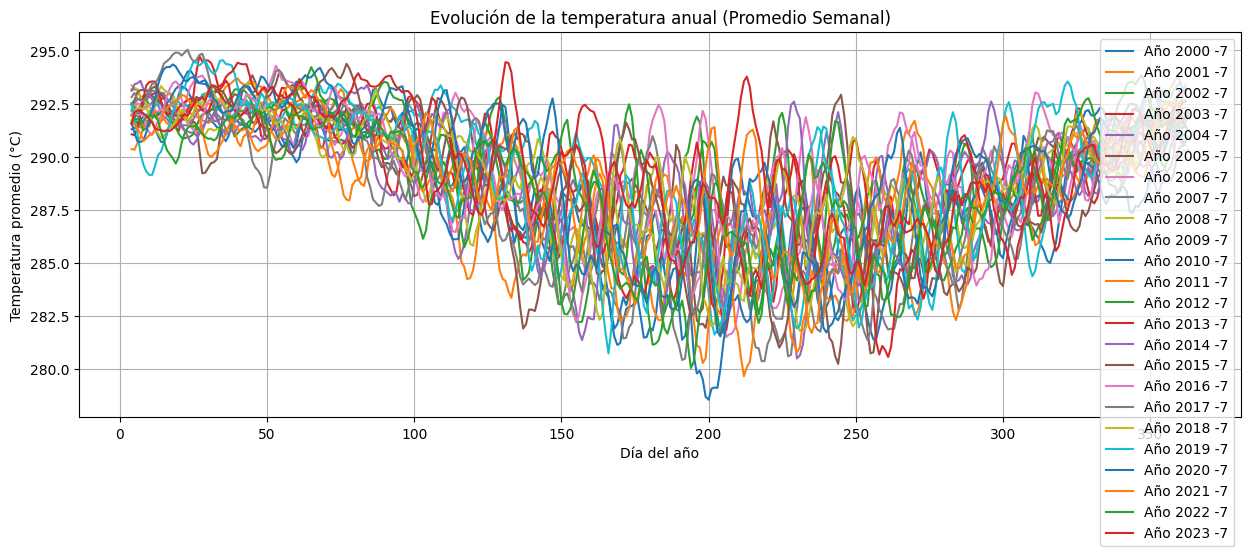

In [ ]:
t['valid_time'] = xr.decode_cf(ds).valid_time

# Calcular promedio espacial (si tiene lat/lon/presión)
t_prom = t.mean(dim=['latitude', 'longitude'])

# Agrupar por día y calcular promedio para cada año
promedio_anual = t_prom.groupby('valid_time.dayofyear').mean(dim='valid_time')

# Graficar cada año por separado con suavizado semanal
plt.figure(figsize=(15, 5))

for año in range(2000, 2024):  # De 2015 a 2019
    datos_anuales = t_prom.sel(valid_time=slice(f'{año}-01-01', f'{año}-12-31')).groupby('valid_time.dayofyear').mean()
    
    # Aplicar suavizado semanal con rolling
    #datos_suavizados = datos_anuales.rolling(dayofyear=1, center=True).mean()
    datos_suavizados2 = datos_anuales.rolling(dayofyear=7, center=True).mean()
    
    #plt.plot(datos_suavizados.dayofyear, datos_suavizados, label=f'Año {año}')
    plt.plot(datos_suavizados2.dayofyear, datos_suavizados2, label=f'Año {año} -7')

# Configurar el gráfico
plt.xlabel('Día del año')
plt.ylabel('Temperatura promedio (°C)')
plt.title('Evolución de la temperatura anual (Promedio Semanal)')
plt.legend()
plt.grid()
plt.show()

C:\Users\herma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xarray\core\groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(
C:\Users\herma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


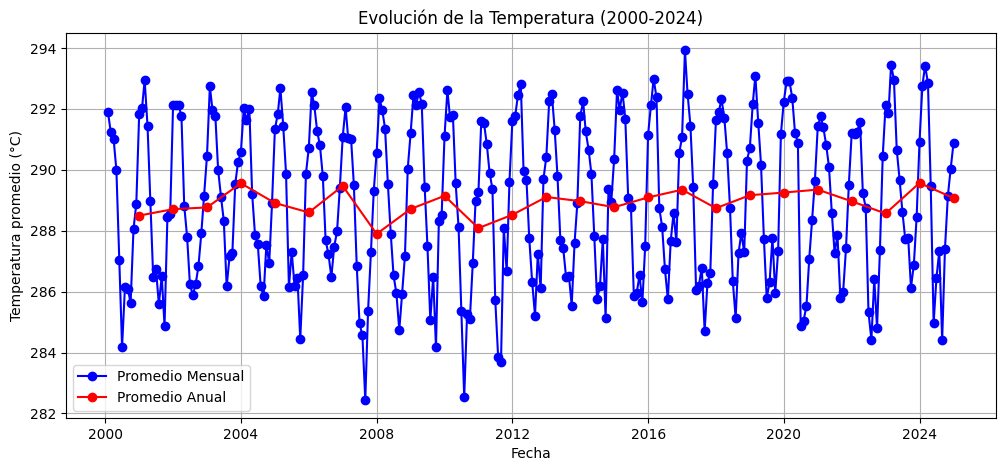

In [11]:
t_prom = t.mean(dim=['latitude', 'longitude', 'pressure_level'])

# Calcular el promedio mensual sin agrupar por años
t_mensual = t_prom.resample(valid_time='1M').mean()
t_Y = t_prom.resample(valid_time='1Y').mean()

# Graficar
plt.figure(figsize=(12, 5))
plt.plot(t_mensual.valid_time, t_mensual, marker='o', linestyle=None, color='b', label='Promedio Mensual')
plt.plot(t_Y.valid_time, t_Y, marker='o', linestyle=None, color='r', label='Promedio Anual')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Temperatura promedio (°C)')
plt.title('Evolución de la Temperatura (2000-2024)')
plt.grid()
plt.legend()
plt.show()

C:\Users\herma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xarray\core\groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(
C:\Users\herma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(
C:\Users\herma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


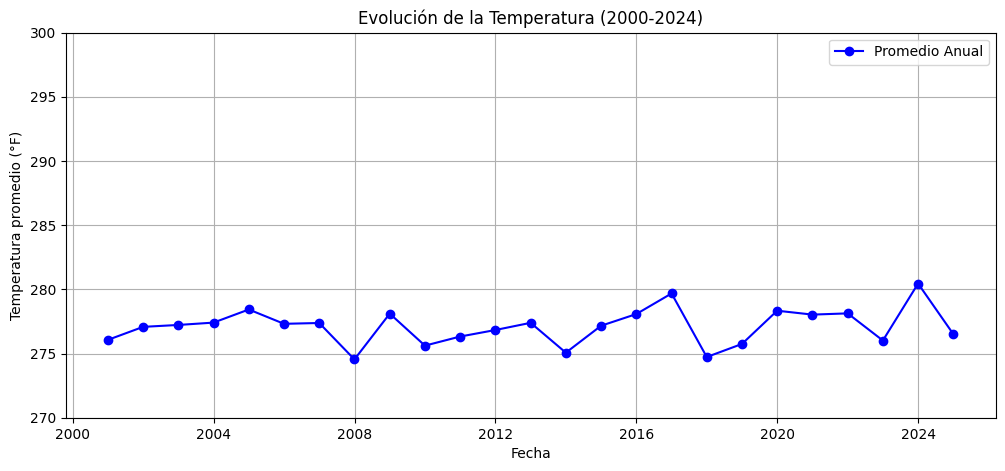

In [17]:
t_prom = t.mean(dim=['latitude', 'longitude', 'pressure_level'])

# Calcular el promedio mensual sin agrupar por años
t_mensual = t_prom.resample(valid_time='1M').max()
t_Y = t_prom.resample(valid_time='1Y').max()
t_Ym = t_prom.resample(valid_time='1Y').min()

# Graficar
plt.figure(figsize=(12, 5))
#plt.plot(t_mensual.valid_time, t_mensual, marker='o', linestyle=None, color='b', label='Promedio Mensual')
#plt.plot(t_Y.valid_time, t_Y, marker='o', linestyle=None, color='r', label='Promedio Anual')
plt.plot(t_Ym.valid_time, t_Ym, marker='o', linestyle=None, color='b', label='Promedio Anual')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Temperatura promedio (°F)')
plt.title('Evolución de la Temperatura (2000-2024)')
plt.grid()
plt.ylim(270,300)
plt.legend()
plt.show()